In [53]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy

### Import data

In [153]:
single = pd.read_csv('./pasco-data-march4/march4-single.csv')
double = pd.read_csv('./pasco-data-march4/march4-double.csv')

### Smooth signal

In [154]:
# process signal before plotting
y1_single = np.convolve(single['Force (N) Run #1'], np.ones(5)/5, mode='same')
y2_single = np.convolve(single['Force (N) Run #2'], np.ones(5)/5, mode='same')
y3_single = np.convolve(single['Force (N) Run #3'], np.ones(5)/5, mode='same')
y4_single = np.convolve(single['Force (N) Run #4'], np.ones(5)/5, mode='same')
y5_single = np.convolve(single['Force (N) Run #5'], np.ones(5)/5, mode='same')
p1_single, _ = scipy.signal.find_peaks(y1_single, width=20)
p2_single, _ = scipy.signal.find_peaks(y1_single, width=20)
p3_single, _ = scipy.signal.find_peaks(y1_single, width=20)
p4_single, _ = scipy.signal.find_peaks(y1_single, width=20)
p5_single, _ = scipy.signal.find_peaks(y1_single, width=20)
print(p1_single)

[ 16  86 155 225 295]


/var/folders/rx/5_fd7v5s5dbc3yr3cx7bw9m40000gn/T/ipykernel_2274/588848497.py:7: PeakPropertyWarning: some peaks have a width of 0
  p1_single, _ = scipy.signal.find_peaks(y1_single, width=20)
/var/folders/rx/5_fd7v5s5dbc3yr3cx7bw9m40000gn/T/ipykernel_2274/588848497.py:8: PeakPropertyWarning: some peaks have a width of 0
  p2_single, _ = scipy.signal.find_peaks(y1_single, width=20)
/var/folders/rx/5_fd7v5s5dbc3yr3cx7bw9m40000gn/T/ipykernel_2274/588848497.py:9: PeakPropertyWarning: some peaks have a width of 0
  p3_single, _ = scipy.signal.find_peaks(y1_single, width=20)
/var/folders/rx/5_fd7v5s5dbc3yr3cx7bw9m40000gn/T/ipykernel_2274/588848497.py:10: PeakPropertyWarning: some peaks have a width of 0
  p4_single, _ = scipy.signal.find_peaks(y1_single, width=20)
/var/folders/rx/5_fd7v5s5dbc3yr3cx7bw9m40000gn/T/ipykernel_2274/588848497.py:11: PeakPropertyWarning: some peaks have a width of 0
  p5_single, _ = scipy.signal.find_peaks(y1_single, width=20)


In [ ]:
# process signal before plotting
# smooth data with moving average
y1_double = np.convolve(double['Force (N) Run #1'], np.ones(5)/5, mode='same')
y2_double = np.convolve(double['Force (N) Run #2'], np.ones(5)/5, mode='same')
y3_double = np.convolve(double['Force (N) Run #3'], np.ones(5)/5, mode='same')
y4_double = np.convolve(double['Force (N) Run #4'], np.ones(5)/5, mode='same')
y5_double = np.convolve(double['Force (N) Run #5'], np.ones(5)/5, mode='same')
y6_double = np.convolve(double['Force (N) Run #6'], np.ones(5)/5, mode='same')
p1_double, _ = scipy.signal.find_peaks(y1_double, width=20)
p2_double, _ = scipy.signal.find_peaks(y1_double, width=20)
p3_double, _ = scipy.signal.find_peaks(y1_double, width=20)
p4_double, _ = scipy.signal.find_peaks(y1_double, width=20)
p5_double, _ = scipy.signal.find_peaks(y1_double, width=20)
p6_double, _ = scipy.signal.find_peaks(y1_double, width=20)

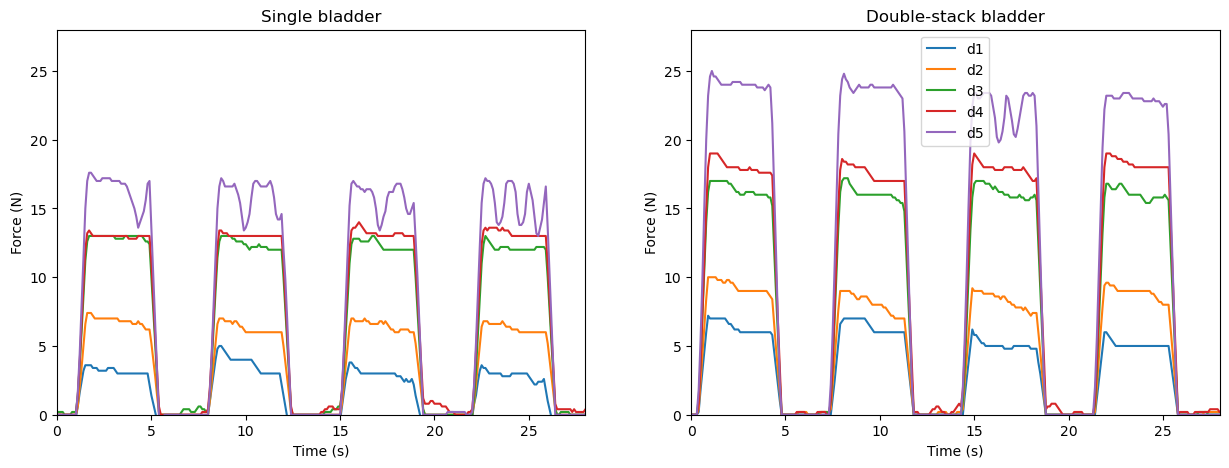

In [164]:
# plot single bladder data
fig, (axs, axd) = plt.subplots(1, 2, figsize=(15, 5))
# for i in range(5):
    # single: 50, 60, 70, 80, 90 PWM
    # double: 50, 60, 70, 80, 90, 100 PWM

axs.plot(single['Time (s) Run #1'], y1_single, label='s1')
axs.plot(single['Time (s) Run #2'], y2_single, label='s2')
axs.plot(single['Time (s) Run #3'], y3_single, label='s3')
axs.plot(single['Time (s) Run #4'], y4_single, label='s4')
axs.plot(single['Time (s) Run #5'], y5_single, label='s5')

axd.plot(double['Time (s) Run #1'], y1_double, label='d1')
axd.plot(double['Time (s) Run #2'], y2_double, label='d2')
axd.plot(double['Time (s) Run #3'], y3_double, label='d3')
axd.plot(double['Time (s) Run #4'], y4_double, label='d4')
axd.plot(double['Time (s) Run #5'], y5_double, label='d5')
# axd.plot(double['Time (s) Run #6'], y6_double, label='d6')

axs.set(title='Single bladder', xlabel='Time (s)', ylabel='Force (N)')
axs.set_xlim(0, 28)
axs.set_ylim(0, 28)

axd.set(title='Double-stack bladder', xlabel='Time (s)', ylabel='Force (N)')
axd.set_xlim(0, 28)
axd.set_ylim(0, 28)
plt.legend()
plt.show()

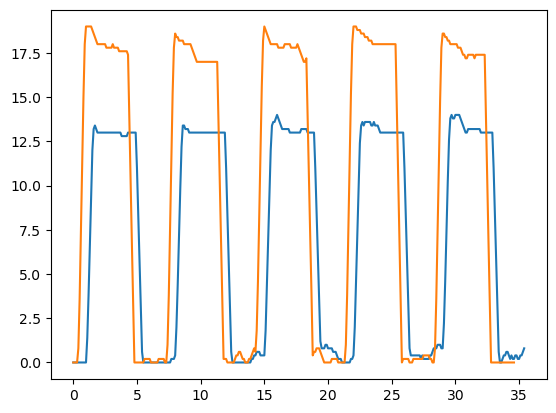

In [166]:
# plotting both on same axes
fig, ax = plt.subplots()
ax.plot(single['Time (s) Run #4'], y4_single, label='single')
ax.plot(double['Time (s) Run #4'], y4_double, label='double')